# 1. Dynamic Programming Introduction.

---
* **Author**: Juan Esteban Cepeda Baena.
* **Linkedin**: https://www.linkedin.com/in/juan-e-cepeda-gestion/
* **Email**: juancepeda.gestion@gmail.com / jecepedab@unal.edu.co
* **Google Site**: https://sites.google.com/view/juancepeda/
* **Code License**: NonCommercial. **If you are going to use my code, please put a link to my github's profile.**
---

Welcome to the first module of my little course on Reinforcement Learning! As I mentioned in the course presentation notebook, we will spent some time styding a brief introduction on Dynamic Programming. **Dynamyc Programming** is a very general solution method for problems which have two properties:

1. Optimal substructure, i.e, Principle of optimality applies and optimal solution can be decomposed into subproblems. 

2. Overlapping subproblems, i.e, subproblems recur many times and solutions can be cached and reused. 

Fortunately, a markov decision process (or MDP for sake of simplicity) satisfy both properties: Bellman equation gives recursive decomposition and value function stores a reuses solutions. The esence of dynamic programming is based on the fact that **we have full knowledge of the MDP, which we will use for planning the solution of a given problem**. But, what does full knowledge means? It means we can completely characterize all the states, actions, transition probabilities and reward function of our stochastic process. This is an extremely weird case when developing IA in practice, since we don't usually know the reward function nor the transition probability matrix.

Before moving forward, I highly recommend to visit David Silver Lectures on Planning by Dynamic Programming: https://www.youtube.com/watch?v=Nd1-UUMVfz4, which will help you to understand what we are going to do next.

In this section, we will solve the **Grid World Problem**, which consist on several elements: a labyrinth of size $n^2$. For accomplish this task, we simplified some elements of the MDP process. 

Instead of using the common Bellman's equations,
1. $V_{\pi}(s) = \sum_{a} \pi(a|s) \sum_{s'} (P_{ss'}^{a}[R_{ss'}^{a} + \gamma V_{\pi}(s')])$ (planning)

2. $\pi'(s) = {argmax}_{a} \sum_{s'} (P_{ss'}^{a}[R_{ss'}^{a} + \gamma V_{\pi}(s')]$ (control).

we use, 
1. $V_{\pi}(s) = \sum_{a} \pi(a|s) [R_{ss_{a}} + \gamma V_{\pi}(s_{a})]$ (planning)
2. $\pi'(s) = \max_{a}(R_{ss_{a}} + \gamma V_{\pi}(s_{a}))$ (control).

respectively.
As you can see, we do not include a transition probability function nor a probabilistic policy, which means we are working with a **deterministic policy and environment.**

Hope you enjoy it!




<img src = "./imagenes/dynamic_programming_backup.png" width = "500" height = "400">
<center>Image 1. Dynamic Programming Planning Process</center>


I highly recommend to visit David Silver Lectures on Planning by Dynamic Programming: https://www.youtube.com/watch?v=Nd1-UUMVfz4

In this section, we will solve the **Grid World Problem**. For accomplish this task, we simplified some elements of the MDP process. 

Instead of using the common Bellman's equations,
1. $V_{\pi}(s) = \sum_{a} \pi(a|s) \sum_{s'} (P_{ss'}^{a}[R_{ss'}^{a} + \gamma V_{\pi}(s')])$ (planning)

2. $\pi'(s) = {argmax}_{a} \sum_{s'} (P_{ss'}^{a}[R_{ss'}^{a} + \gamma V_{\pi}(s')]$ (control).

we use, 
1. $V_{\pi}(s) = \sum_{a} \pi(a|s) [R_{ss_{a}} + \gamma V_{\pi}(s_{a})]$ (planning)
2. $\pi'(s) = \max_{a}(R_{ss_{a}} + \gamma V_{\pi}(s_{a}))$ (control).

respectively.
As you can see, we do not include a transition probability function nor a probabilistic policy, which means we are working with a **deterministic policy and environment.**

Hope you enjoy it!

In [1]:
# Import libraries.
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
import time
import random
from IPython.display import clear_output

%matplotlib inline

In [2]:
class Graphics():
    
    def __init__(self):
        print("Graphics module ready!")
        
    def render(self, x, y, environment, plot_values = True):
            
        fig1 = plt.figure(figsize=(4, 4))
        ax1 = fig1.add_subplot(111, aspect='equal')

        # Horizontal lines.
        for i in range(0, 6):
            ax1.axhline(i * 0.2, linewidth=2, color="#2D2D33")
            ax1.axvline(i * 0.2, linewidth=2, color="#2D2D33")

        # Salida, Meta & GameOver.
        ax1.add_patch(patches.Rectangle((0.0, 0.0), 0.2, 0.2, facecolor = "#F6D924"))
        
        ax1.add_patch(patches.Rectangle((0.2, 0.8), 0.2, 0.2, facecolor = "#F6D924"))
        ax1.add_patch(patches.Rectangle((0.8, 0.2), 0.2, 0.2, facecolor = "#F6D924"))
        
        ax1.add_patch(patches.Rectangle((0.8, 0.6), 0.2, 0.2, facecolor = "#68FF33"))
        #ax1.add_patch(patches.Rectangle((0.8, 0.8), 0.2, 0.2, facecolor = "#FF5533"))
        
        # Muros del juego.
        ax1.add_patch(patches.Rectangle((0.2, 0.4), 0.2, 0.4, facecolor = "#33A4FF"))
        ax1.add_patch(patches.Rectangle((0.6, 0.2), 0.2, 0.2, facecolor = "#33A4FF"))
        ax1.add_patch(patches.Rectangle((0.2, 0.0), 0.2, 0.2, facecolor = "#33A4FF"))
        
        ax1.add_patch(patches.Rectangle((0.4, 0.8), 0.2, 0.2, facecolor = "#33A4FF"))
        ax1.add_patch(patches.Rectangle((0.4, 0.8), 0.2, 0.2, facecolor = "#33A4FF"))
        ax1.add_patch(patches.Rectangle((0.8, 0.4), 0.2, 0.2, facecolor = "#33A4FF"))
        
        # Limit grid view.
        plt.ylim((0, 1))
        plt.xlim((0, 1))

        # Plot player.
        plt.scatter(x, y, s = 100, color = "black", marker = "o", facecolor = "blue", edgecolors = "blue", zorder = 10)

        # Plot state values.
        if plot_values:
            for i in range(0, len(environment.value_state_table)):
                for j in range(0, len(environment.value_state_table[0])):
                    plt.text(environment.grid_pos[i] - 0.08, environment.grid_pos[j] - 0.03, 
                             round(environment.value_state_table[i][j], 1), fontsize=16)
                
        # Plot grid.
        plt.axis("off")
        plt.show()  

In [3]:
class GridEnvironment():
    
    def __init__(self):
        
        self.rw = -1 # Living (Movement) Penalty
        self.walls_and_paths = [[1, 1, 1, 1, 1], [0, 1, 0, 0, 1], [1, 1, 1, 1, 0], [1, 0, 1, 1, 1], [1, 1, 0, 1, 1]]
        self.rewards = [[self.rw, self.rw, self.rw, self.rw, self.rw], 
                        [self.rw, self.rw, self.rw, self.rw, self.rw], 
                        [self.rw, self.rw, self.rw, self.rw, self.rw], 
                        [self.rw, self.rw, self.rw, self.rw, self.rw], 
                        [self.rw, self.rw, self.rw, self.rw, self.rw]]
        self.grid_pos = [0.1, 0.3, 0.5, 0.7, 0.9]
        self.value_state_table = [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 100, 0]]
    
    def getStateValue(self, position):
        return self.value_state_table[position[0]][position[1]]
    
    def reset(self):
        self.value_state_table = [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 100, 0]]

Graphics module ready!


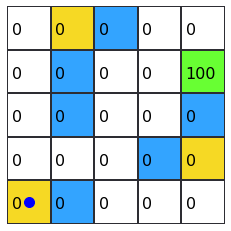

In [4]:
environment = GridEnvironment()
graph = Graphics()
graph.render(0.1, 0.1, environment)

In [5]:
class valueBasedAgent():
    
    def __init__(self, environment, policy, discount_factor):
        self.pos = [0,0]
        self.total_reward = 0
        self.environment = environment
        self.discount_factor = discount_factor
        self.actions = ["up", "down", "left", "right"]
        
        # Start with a random policy. 0.25 chance of moving to any direction.
        self.policy = policy   
            
    def forwardState(self, pos, action):
        
        # New position array.
        new_position = pos
        
        # Compute new position based on action taken.
        if(action == "up" and pos[1] < 4):
            if(self.environment.walls_and_paths[pos[0]][pos[1] + 1]) == 1:
                new_position = [pos[0], pos[1] + 1]

        elif(action == "down" and pos[1] > 0):
            if(self.environment.walls_and_paths[pos[0]][pos[1] - 1]) == 1:
                new_position = [pos[0], pos[1] - 1]
                
        elif(action == "left" and pos[0] > 0):
            if(self.environment.walls_and_paths[pos[0] - 1][pos[1]]) == 1:
                new_position = [pos[0] - 1, pos[1]]

        elif(action == "right" and pos[0] < 4):
            if(self.environment.walls_and_paths[pos[0] + 1][pos[1]]) == 1:
                new_position = [pos[0] + 1, pos[1]]
        return new_position
        
        
    def valueFunction(self):
            
        # Initialize variable.
        new_state_value = 0
    
        # Random movement!
        if self.policy[self.pos[0]][self.pos[1]] == "r":
            for action in self.actions:        
                forward_state = self.forwardState(self.pos, action)
                
                # Simplified version of Q-value.
                q_value = (self.environment.rewards[forward_state[0]][forward_state[1]] 
                                    + self.discount_factor * self.environment.value_state_table[forward_state[0]][forward_state[1]])
                new_state_value += q_value * 0.25
            return new_state_value
        
        # Not random movement!
        else: 
            action = self.policy[self.pos[0]][self.pos[1]]
            forward_state = self.forwardState(self.pos, action)
            
            # Simplified version of Q-value.
            q_value = (self.environment.rewards[forward_state[0]][forward_state[1]] 
                                    + self.discount_factor * self.environment.value_state_table[forward_state[0]][forward_state[1]])
            new_state_value += q_value
            return new_state_value
        
    def getPosition(self):
        return self.pos
    
    def getReward(self):
        return self.total_reward
    
    def setPosition(self, x, y):
        self.pos = [x, y]
        
    def updateValueStateTable(self):
        new_state_value = self.valueFunction()
        self.environment.value_state_table[self.pos[0]][self.pos[1]] = new_state_value
        
    def selectBestAction(self):
        
        # Compute new possible states.
        go_up = self.forwardState(self.pos, "up")
        go_down = self.forwardState(self.pos, "down")
        go_left = self.forwardState(self.pos, "left")
        go_right = self.forwardState(self.pos, "right")
        
        # Q values (simplified version).
        up_value = (self.environment.rewards[go_up[0]][go_up[1]] + 
                    self.discount_factor * self.environment.value_state_table[go_up[0]][go_up[1]])
        down_value = (self.environment.rewards[go_down[0]][go_down[1]] + 
                      self.discount_factor * self.environment.value_state_table[go_down[0]][go_down[1]])
        left_value = (self.environment.rewards[go_left[0]][go_left[1]] + 
                        self.discount_factor * self.environment.value_state_table[go_left[0]][go_left[1]])
        right_value = (self.environment.rewards[go_right[0]][go_right[1]] + 
                       self.discount_factor * self.environment.value_state_table[go_right[0]][go_right[1]])
        
        # Array of Q-values.
        values = [up_value, down_value, left_value, right_value]
        
        best_action = self.actions[values.index(max(values))] 
        return best_action       
            
    def move(self):
    
        # Select action according to policy.
        action = self.policy[self.pos[0]][self.pos[1]]
        print("Action taken", action)

        # Move to new position according to action taken.
        self.pos = self.forwardState(self.pos, action)
        print("New Position: ", self.pos)

In [6]:
class PolicyEvaluation(Graphics):
    
    def __init__(self, environment, agent, iterations = 3):
        
        self.environment = environment       
        self.agent = agent                     
        #print("GridWorld Initialize!")
        self.iterations = iterations
    
    def evaluate(self, plot_grid = True):
        self.DP_policy_evaluation(self.iterations, plot_grid)
        
    def DP_policy_evaluation(self, iterations, plot_grid):
        
        for k in range(0, iterations):
            for i in range(0, len(self.environment.value_state_table)):
                for j in range(0, len(self.environment.value_state_table[0])):

                    if self.environment.walls_and_paths[i][j] == 1 and self.canChangeStateValue(i, j):

                        # Set agent position.
                        self.agent.setPosition(i, j)
                        self.agent.updateValueStateTable()

                        # Method of the super class.
                        if(plot_grid):
                            
                            # Render game.
                            pos = self.agent.getPosition()
                            grid_coords = self.environment.grid_pos
                            
                            self.render(grid_coords[pos[0]], grid_coords[pos[1]], self.environment, True)
                            time.sleep(0.01)
                            clear_output(wait = True)
                            
    

    def canChangeStateValue(self, x, y):
        cant_modify = bool((x == 4 and y == 3)) # or (x == 4 and y == 4))
        
        grid = self.environment.walls_and_paths
        coords = list()
        
        # Get walls.
        for i in range(0, len(grid)):
            for j in range(0, len(grid[0])):
                if grid[i][j] == 0:
                    coords.append([i, j])
        for c in coords: 
            if c == [x, y]:
                cant_modify = True
                break
                
        return not cant_modify
    
    def updatePolicy(self):
        
         for i in range(0, len(self.environment.value_state_table)):
                for j in range(0, len(self.environment.value_state_table[0])):
                    if self.environment.walls_and_paths[i][j] == 1:
                        
                        # Set agent position.
                        self.agent.setPosition(i, j)
                        best_action = self.agent.selectBestAction()
                        self.agent.policy[i][j] = best_action

In [7]:
class Game(Graphics):
    
    def __init__(self, environment, agent):
        
        self.environment = environment       
        self.agent = agent             
        print("GridWorld Initialize!")
                
    def update(self, secs):
        
        pos = self.agent.getPosition()
        grid_coords = self.environment.grid_pos
        self.render(grid_coords[pos[0]], grid_coords[pos[1]], self.environment, False)
        time.sleep(1)
        clear_output(wait = True)
        
        while not ((self.agent.pos[0] == 4 and self.agent.pos[1] == 4) or (self.agent.pos[0] == 4 and self.agent.pos[1] == 3)):
            
            self.agent.move()
            pos = self.agent.getPosition()
            self.render(grid_coords[pos[0]], grid_coords[pos[1]], self.environment, False)
            
            time.sleep(secs)
            clear_output(wait = True)
            
        #self.render(grid_coords[pos[0]], grid_coords[pos[1]], self.environment, False)
        #time.sleep(secs)
        #print("Yuhuu, we won the game!")
        #clear_output(wait = True)

### 1. Policy Evaluation (Planning) for DP.

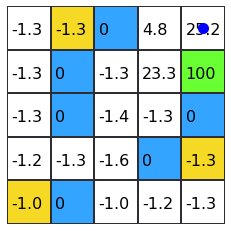

In [21]:
# Generate the random policy.
policy = list()
for i in range(0, 5):
    column = list()
    for j in range(0, 5):
        column.append("r")
    policy.append(column)

# Initialize environment and agent.
discount_factor = 1
environment = GridEnvironment()
agent = valueBasedAgent(environment, policy, discount_factor)

# Initialize policy evaluation class.
policy_evaluation = PolicyEvaluation(environment, agent, iterations = 1)
policy_evaluation.evaluate(plot_grid = True)

In [15]:
environment.value_state_table

[[-110.87741692908136,
  -106.88071433925548,
  -122.86911267445035,
  -134.8602296212664,
  -142.8542261090061],
 [0, -82.8979977735338, 0, 0, -146.85120389131987],
 [-70.90855702053615,
  -54.917222827805965,
  -6.946039455371832,
  19.039104809861588,
  0],
 [-82.90235097388641,
  0,
  19.039104809861584,
  49.0235600559263,
  62.01592280060383],
 [-90.89815668658741, -94.89604524769868, 0, 100, 79.00801566941342]]

In [16]:
policy_evaluation.updatePolicy()

In [17]:
# New agent policy after policy evaluation.
agent.policy

[['up', 'right', 'down', 'down', 'down'],
 ['r', 'right', 'r', 'r', 'left'],
 ['up', 'up', 'up', 'right', 'r'],
 ['left', 'r', 'up', 'right', 'right'],
 ['left', 'down', 'r', 'down', 'down']]

#### Win the Game with the previous policy evaluation results.

Action taken right
New Position:  [4, 3]


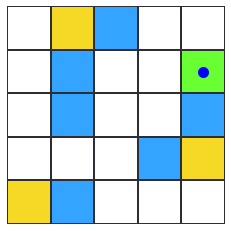

In [18]:
agent.pos = [1, 4]
game = Game(environment, agent)
game.update(0.1)

Action taken right
New Position:  [4, 3]


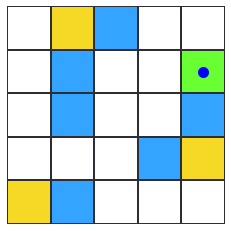

In [19]:
agent.pos = [4, 1]
game = Game(environment, agent)
game.update(0.1)

Action taken right
New Position:  [4, 3]


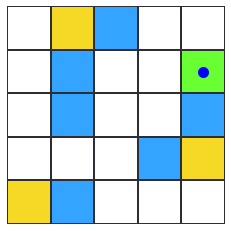

In [20]:
agent.pos = [0, 0]
game = Game(environment, agent)
game.update(0.1)

Great! We made it! We have developed our first artificial intelligence. As you can see, we took a random policy and evaluate it through our policity evaluation algorithm, then, we encourage our agent to take the best action for each state, which lead us to an amazing result.

Something that surprised me the very first time I learnt about **Dynamic Programming**, was the fact that even though we chose a random policy, it led us to a solution of the grid world problem. According to the this, how our solution could change if we would have choosen a more reasonable policy? This is the question that we are going to try to answer in the following section, through **Policity Iteration** and **Value Iteration**.

### 2. Policy Iteration (Control). Improving our Policy.

<img src="https://miro.medium.com/max/2624/1*udhphWhqjadT-osAQhL6AQ.png" width ="600" height="400">

In [14]:
# Generate the random policy.
policy = list()
for i in range(0, 5):
    column = list()
    for j in range(0, 5):
        column.append("r")
    policy.append(column)
    
# Initaliza environment and agent.
discount_factor = 0.5
environment = GridEnvironment()
agent = valueBasedAgent(environment, policy, discount_factor)

# Policy iteration algorithm.
for i in range(0, 1000):

    # Reset value function.
    environment.reset()

    # Evaluate new policy.
    policy_evaluation = PolicyEvaluation(environment, agent, iterations = 10)
    policy_evaluation.evaluate(plot_grid = False)
    policy_evaluation.updatePolicy()

#### The optimal policy.

In [15]:
agent.policy

[['up', 'right', 'down', 'down', 'down'],
 ['r', 'right', 'r', 'r', 'left'],
 ['up', 'up', 'up', 'right', 'r'],
 ['left', 'r', 'up', 'right', 'down'],
 ['left', 'down', 'r', 'down', 'down']]

### 3. Value Iteration (Control). Improving our Policy.


<img src="https://media.springernature.com/original/springer-static/image/chp%3A10.1007%2F978-3-319-63387-9_10/MediaObjects/454766_1_En_10_Figa_HTML.gif" width ="600" height="400">


In [80]:
# Generate the random policy.
policy = list()
for i in range(0, 5):
    column = list()
    for j in range(0, 5):
        column.append("r")
    policy.append(column)
    
# Initaliza environment and agent.
discount_factor = 0.6
environment = GridEnvironment()
agent = valueBasedAgent(environment, policy, discount_factor)

# Policy iteration algorithm.
for i in range(0, 1000):

    # Reset value function.
    # environment.reset() => We do not reset the environment? 

    # Evaluate new policy.
    policy_evaluation = PolicyEvaluation(environment, agent, iterations = 1)
    policy_evaluation.evaluate(plot_grid = False)
    policy_evaluation.updatePolicy()

#### The optimal policy.

In [81]:
agent.policy

[['up', 'right', 'down', 'down', 'down'],
 ['r', 'right', 'r', 'r', 'left'],
 ['up', 'up', 'up', 'right', 'r'],
 ['left', 'r', 'up', 'right', 'down'],
 ['left', 'down', 'r', 'down', 'down']]

As you can see, it doesn't matter which method we use, it is guarantee by the Contraction Mapping Theorem to always converge to the optimal policy. In future lectures, we will see that it is not always the case when we can compute the optimal policy, that's why we will present new algorithms that allow us to aproximmate our value function, and therefore the optimal policy.